# Importing Libraries #

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gamma
import random
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

random.seed(10)

# Importing Dataset #

In [2]:
df = pd.read_csv('Train.csv')
df.head()

,LID,CHNL,SELLER,ORIGRATE,ORIGUPB,ORIGTERM,ORIGDATE,FSTPAY,LOANAGE,REMMNTHS,...,DLQSTATUS,MODFLAG,MITYPE,RELMORTGIND,ACTPER_MO,ORIGDATE_MO,FSTPAY_MO,MATDT_MO,NMONTHS,FORCLOSED
0,946681740815,B,"Jpmorgan Chase Bank, National Association",8.000,100000.0,360,32000,52000,1,359,...,0,N,NaN,N,4,2,4,363,17,False
1,921089628109,R,"Gmac Mortgage, Llc",7.625,100000.0,180,42000,62000,0,180,...,0,N,NaN,N,4,3,5,184,32,False
2,738779422112,C,"Flagstar Bank, Fsb",8.000,226000.0,180,32000,52000,1,179,...,0,N,NaN,N,4,2,4,183,19,False
3,615798070845,R,Other,8.205,143000.0,360,32000,52000,0,360,...,0,N,NaN,N,3,2,4,363,21,False
4,345601060557,R,Other,8.500,46000.0,360,32000,52000,0,360,...,0,N,NaN,N,3,2,4,363,17,False


# Choose useful features by rational understanding

LID="Loan_ID", CHNL="CHANNEL", SELLER="SELLER", <br>ORIGRATE="ORIG_RATE", ORIGUPB="ORIG_UPB", ORIGTERM="ORIG_TERM", <br>ORIGDATE="ORIG_DATE", FSTPAY="FIRST_PAY", LOANAGE="LOAN_AGE",<br>REMMNTHS="REM_MONTHS", ADJRMTHS="ADJ_REM_MONTHS", MATDT="MATR_DT",<br>OLTV="OLTV", OCLTV="OCLTV",NUMBO="NUM_BO", <br>DTI="DTI", CSCOREB="CSCORE_B", CSCOREC="CSCORE_C",<br>FIRSTFLAG="FIRST_FLAG", PURPOSE="PURPOSE",PROP="PROP", <br>NO_UNITS="NO_UNITS", OCCSTAT="OCC_STAT", STATE="STATE", <br>MSA="MSA", ZIP="ZIP", MIPCT="MI_PCT",<br>IO="IO", DLQSTATUS="DLQ_STATUS", MODFLAG="MOD_FLAG", <br>MITYPE="MI_TYPE",RELMORTGIND="RELOCATION_MORTGAGE_INDICATOR",ACTPER_MO="ACT_PERIOD"?,<br>ORIGDATE_MO="ORIG_DATE_Month", ,FSTPAY_MO="FIRST_PAY_Month",MATDT_MO="MATR_DT_Month",<br>NMONTHS=,FORCLOSED=

1.LID is id so not useful
<br>2.Channel is the orgination channel used by the party that delivered the loan to issuers not useful
<br>3.Seller Name not useful
<br>4.ORIG_DATE is The date of each individual note. not useful
<br>5.FIRST_PAY is First pay date not useful
<br>6.REM_MONTHS = The number of calendar months remaining until the mortgage loan is due to be paid in full based on the maturity date as defined in the mortgage documents. Since we have adjust version so no useful. high correlation
<br>7.MATR_DT = Maturity Date = Date value not useful
<br>8.STATE = Not in or first considerration
<br>9.MSA = Not in or first considerration
<br>10.ZIP = Not useful
<br>11.MOD_FLAG = An indicator that denotes if the mortgage loan has been modified. not useful
<br>12.ACTPER_MO, ORIGDATE_MO,FSTPAY_MO,MATDT_MO ALL MONTH VALUE NOT USEFUL
<br>13.OCLTV is highly correlated with OLTV (99% of the time they are the same)

1.ORIG_RATE = The original interest rate on a mortgage loan as identified in the original mortgage note
<br>2.ORIG_UPB = The dollar amount of the loan as stated on the note at the time the loan was originated
<br>3.ORIG_TERM = For fixed-rate, adjustable-rate and Interest-only mortgages, the number of months in which regularly scheduled borrower payments are due at the time the loan was originated.
<br>4.LOAN_AGE = The number of calendar months since the mortgage loan's origination date.
<br>5.ADJ_REM_MONTHS 
<br>6.OLTV = Original Loan to Value Ratio (LTV)
<br>7.NUM_BO = Number of Borrowers
<br>8.DTI = Debt-To-Income (DTI)
<br>9.CSCORE_B = Borrower Credit Score at Origination
<br>10.CSCORE_C = Co-Borrower Credit Score at Origination
<br>11.FIRST_FLAG = First Time Home Buyer Indicator
<br>12.PURPOSE = Loan Purpose
<br>13.PROP = Property Type
<br>14.NO_UNITS = Number of Units
<br>15.OCC_STAT = Occupancy Status
<br>16.MI_PCT = Mortgage Insurance Percentage = The original percentage of mortgage insurance coverage obtained for an insured conventional mortgage loan and used following the occurrence of an event of default to calculate the insurance benefit, as defined by the underlying master primary insurance policy.
<br>17.IO = Interest Only Loan Indicator
<br>18.DLQ_STATUS = Current Loan Delinquency Status
<br>19.MI_TYPE = Mortgage Insurance Type (Null as no MI)
<br>20.RELOCATION_MORTGAGE_INDICATOR = An indicator that denotes whether or not the type of mortgage loan is a relocation mortgage loan, made to borrowers whose employers relocate their employees.

In [3]:
df=df[['ORIGRATE','ORIGUPB','ORIGTERM','LOANAGE','ADJRMTHS','OLTV',
    'NUMBO','DTI','CSCOREB','CSCOREC','FIRSTFLAG','PURPOSE','PROP','NO_UNITS',
   'OCCSTAT','MIPCT','IO','DLQSTATUS','MITYPE','RELMORTGIND','NMONTHS']]

# Exploratory Data Analysis

In [4]:
df.head()

,ORIGRATE,ORIGUPB,ORIGTERM,LOANAGE,ADJRMTHS,OLTV,NUMBO,DTI,CSCOREB,CSCOREC,...,PURPOSE,PROP,NO_UNITS,OCCSTAT,MIPCT,IO,DLQSTATUS,MITYPE,RELMORTGIND,NMONTHS
0,8.000,100000.0,360,1,359,51.0,2.0,19.0,704.0,NaN,...,R,SF,1,P,NaN,NaN,0,NaN,N,17
1,7.625,100000.0,180,0,180,80.0,1.0,35.0,725.0,NaN,...,C,SF,1,P,NaN,NaN,0,NaN,N,32
2,8.000,226000.0,180,1,178,80.0,2.0,42.0,772.0,769.0,...,P,SF,1,P,NaN,NaN,0,NaN,N,19
3,8.205,143000.0,360,0,360,77.0,2.0,33.0,674.0,501.0,...,P,SF,1,P,NaN,NaN,0,NaN,N,21
4,8.500,46000.0,360,0,360,80.0,2.0,21.0,753.0,730.0,...,C,SF,1,P,NaN,NaN,0,NaN,N,17


In [5]:
df.shape

(200000, 21)

In [6]:
df.describe()

,ORIGRATE,ORIGUPB,ORIGTERM,LOANAGE,ADJRMTHS,OLTV,NUMBO,DTI,CSCOREB,CSCOREC,NO_UNITS,MIPCT,DLQSTATUS,MITYPE,NMONTHS
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,199999.000000,199914.000000,192489.000000,196133.000000,95959.000000,200000.000000,67454.000000,200000.000000,67454.000000,200000.000000
mean,8.299283,121416.440000,329.531600,0.478755,328.061880,76.757834,1.610893,34.871806,717.336415,725.427182,1.034590,24.268909,0.001580,1.035847,28.072110
std,0.425457,56948.813276,67.001587,1.173612,67.456452,16.445143,0.514525,11.941142,55.045778,53.317339,0.229268,6.267456,0.041322,0.186228,30.035923
min,2.990000,8000.000000,60.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,356.000000,357.000000,1.000000,6.000000,0.000000,1.000000,1.000000
25%,8.000000,77000.000000,360.000000,0.000000,358.000000,70.000000,1.000000,26.000000,679.000000,690.000000,1.000000,18.000000,0.000000,1.000000,13.000000
50%,8.250000,113000.000000,360.000000,0.000000,359.000000,80.000000,2.000000,35.000000,726.000000,736.000000,1.000000,25.000000,0.000000,1.000000,20.000000
75%,8.500000,157000.000000,360.000000,1.000000,360.000000,90.000000,2.000000,43.000000,761.000000,767.000000,1.000000,30.000000,0.000000,1.000000,32.000000
max,11.500000,486000.000000,360.000000,16.000000,360.000000,97.000000,10.000000,64.000000,838.000000,846.000000,4.000000,50.000000,4.000000,3.000000,242.000000


In [7]:
Categorical=['FIRSTFLAG','PURPOSE','PROP','OCCSTAT','MITYPE',"RELMORTGIND",'IO']
Numerical=['ORIGRATE','ORIGTERM','ORIGUPB','LOANAGE','ADJRMTHS','OLTV','NUMBO','DTI','CSCOREB',
          'CSCOREC','NO_UNITS']
Binary = ['DLQSTATUS']

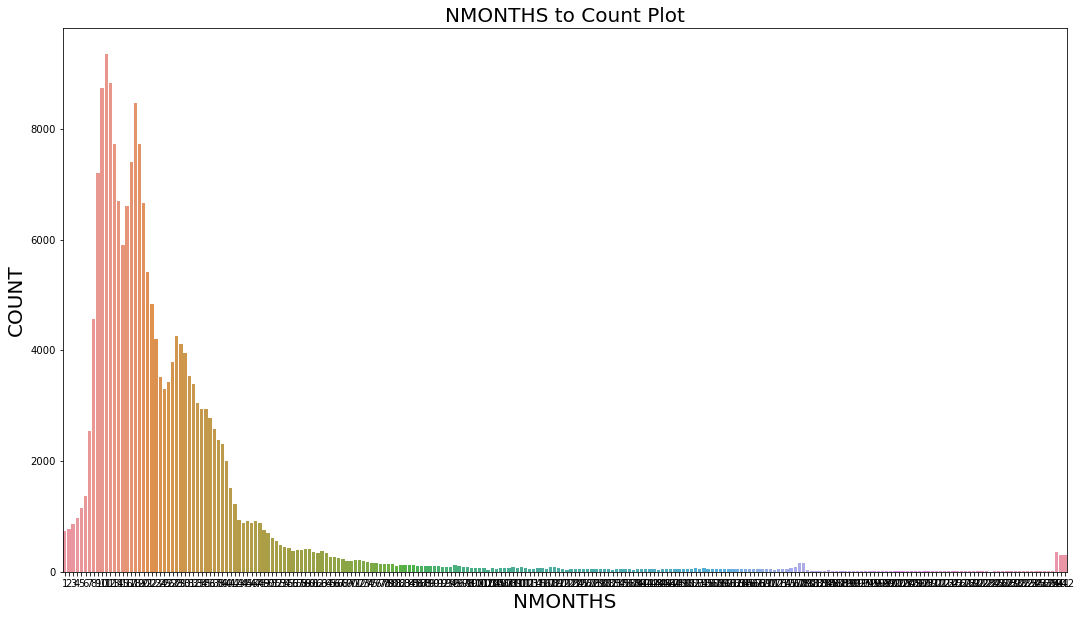

In [8]:
plt.figure(figsize=(18, 10))
sns.countplot(x=df["NMONTHS"])
plt.title("NMONTHS to Count Plot",fontsize=20)
plt.xlabel("NMONTHS",fontsize=20)
plt.ylabel("COUNT",fontsize=20)
plt.show();

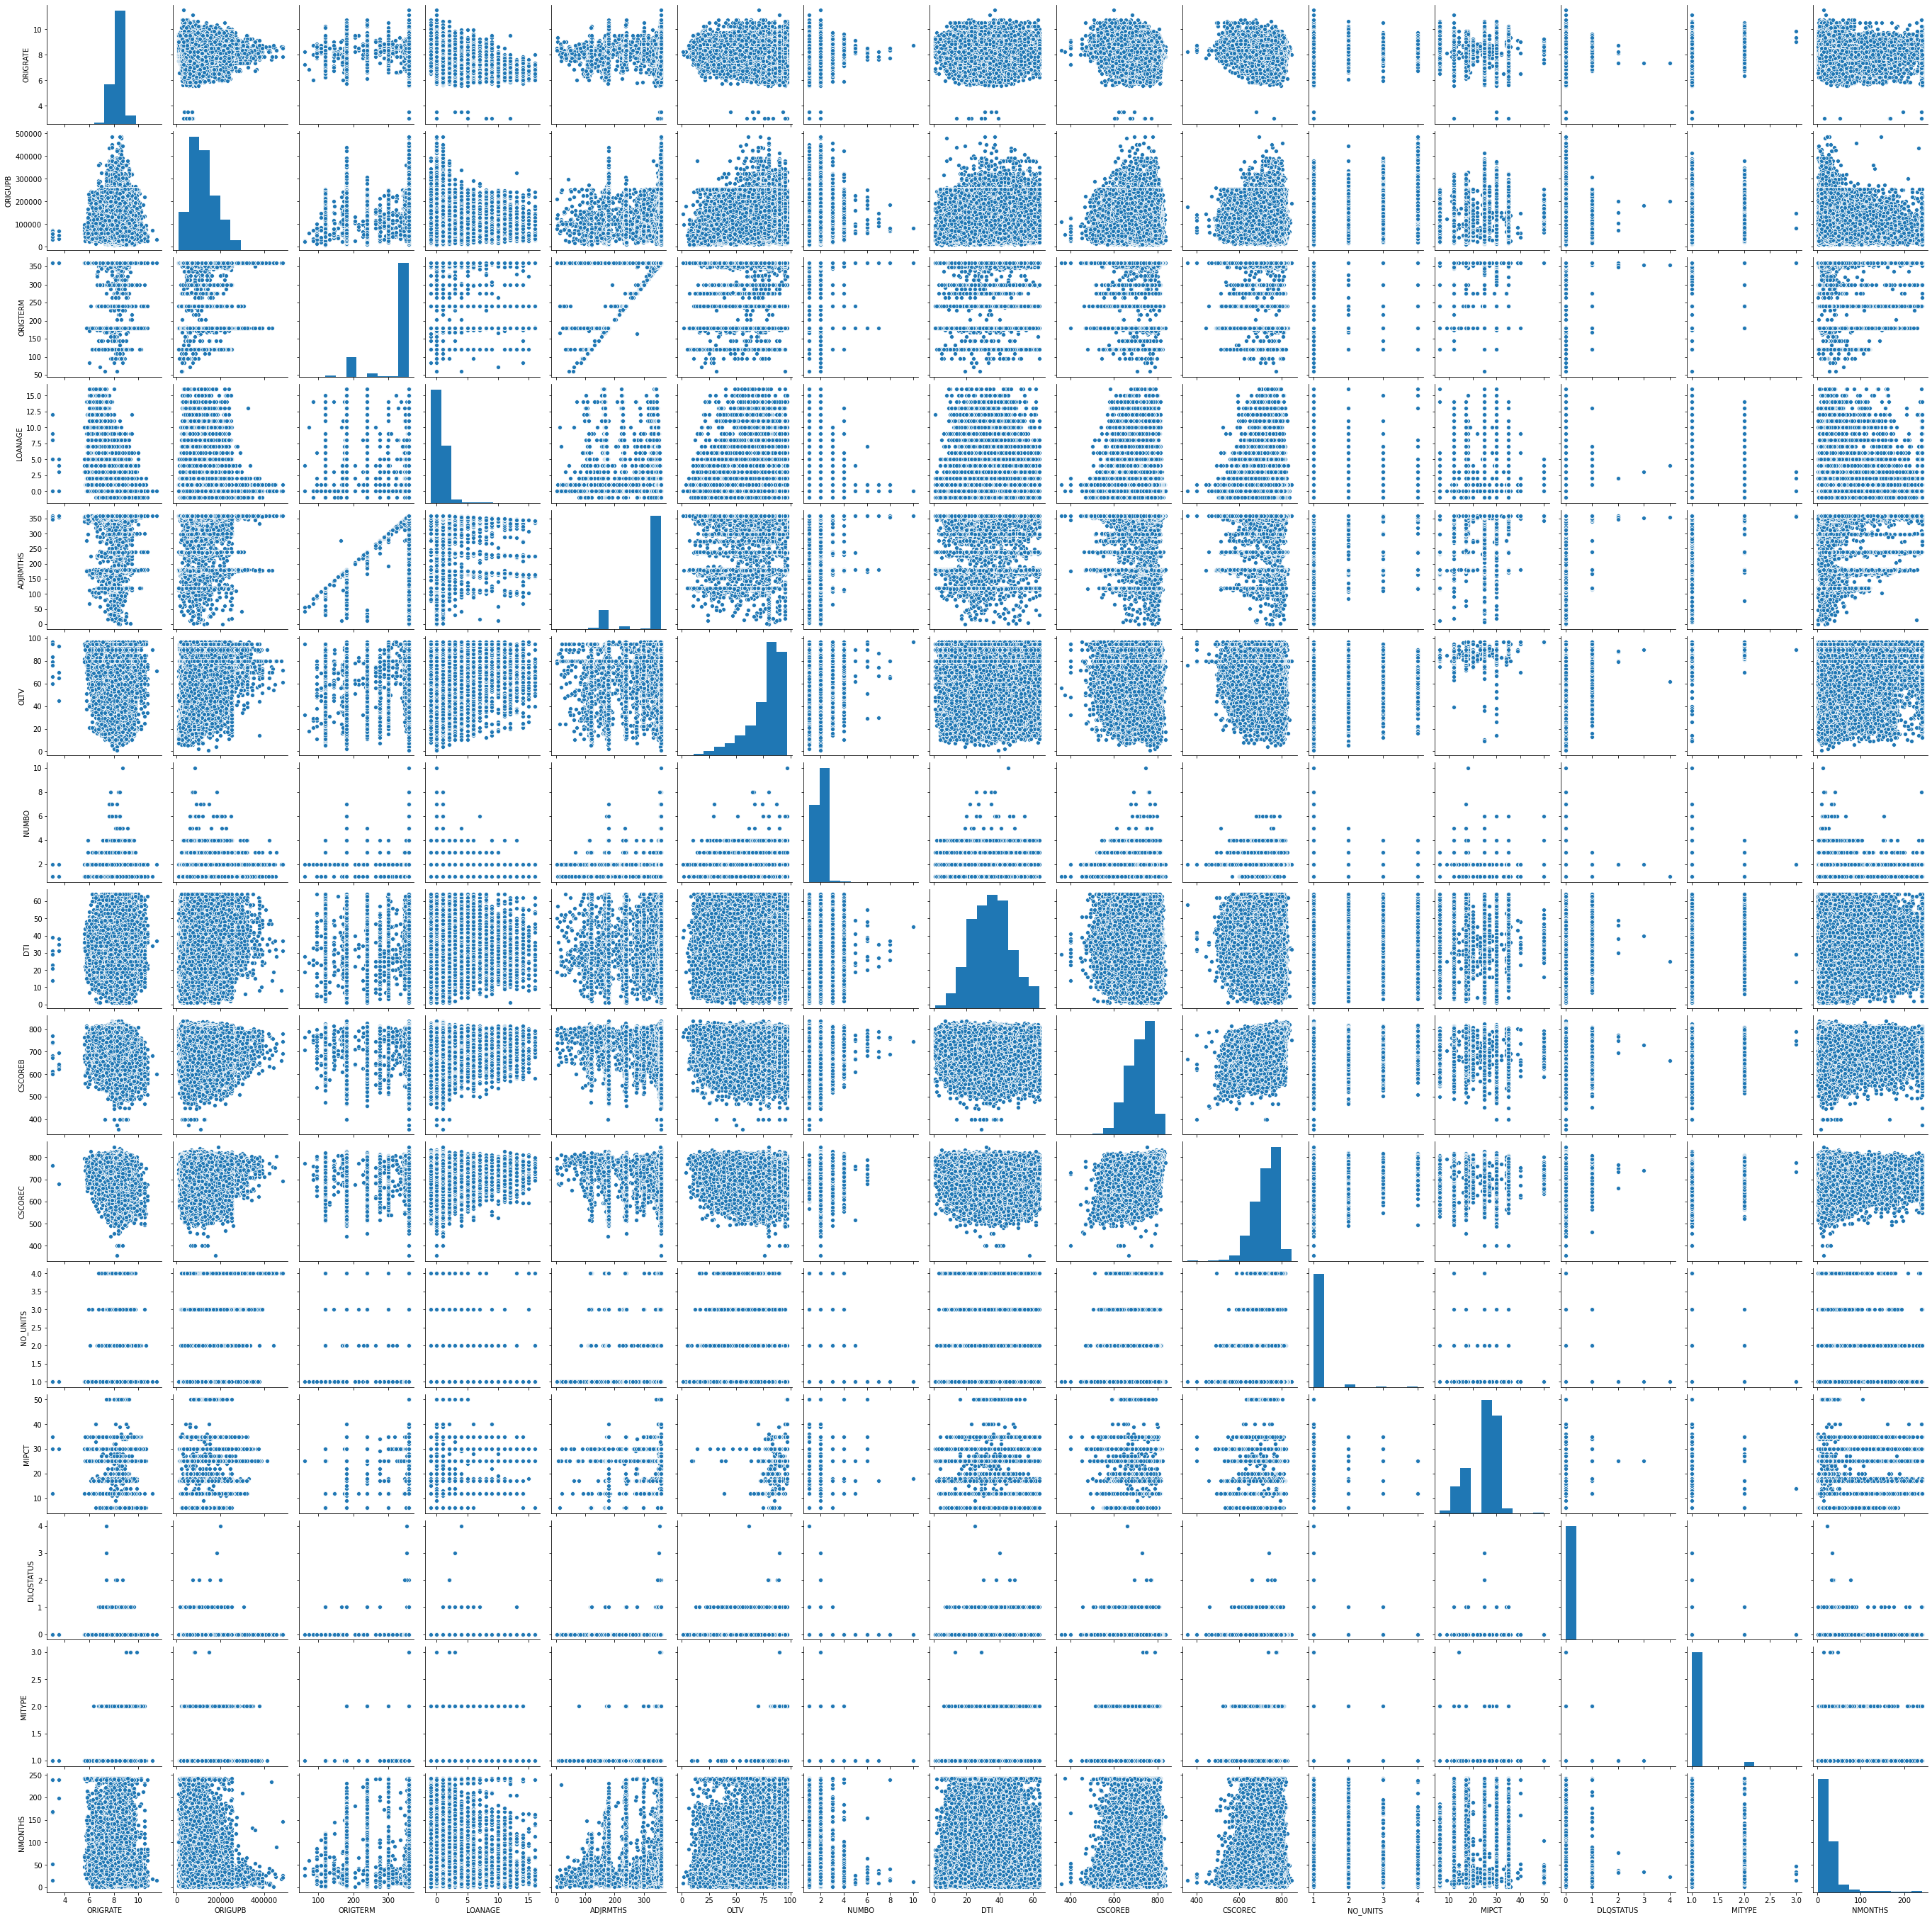

In [9]:
sns.pairplot(df)

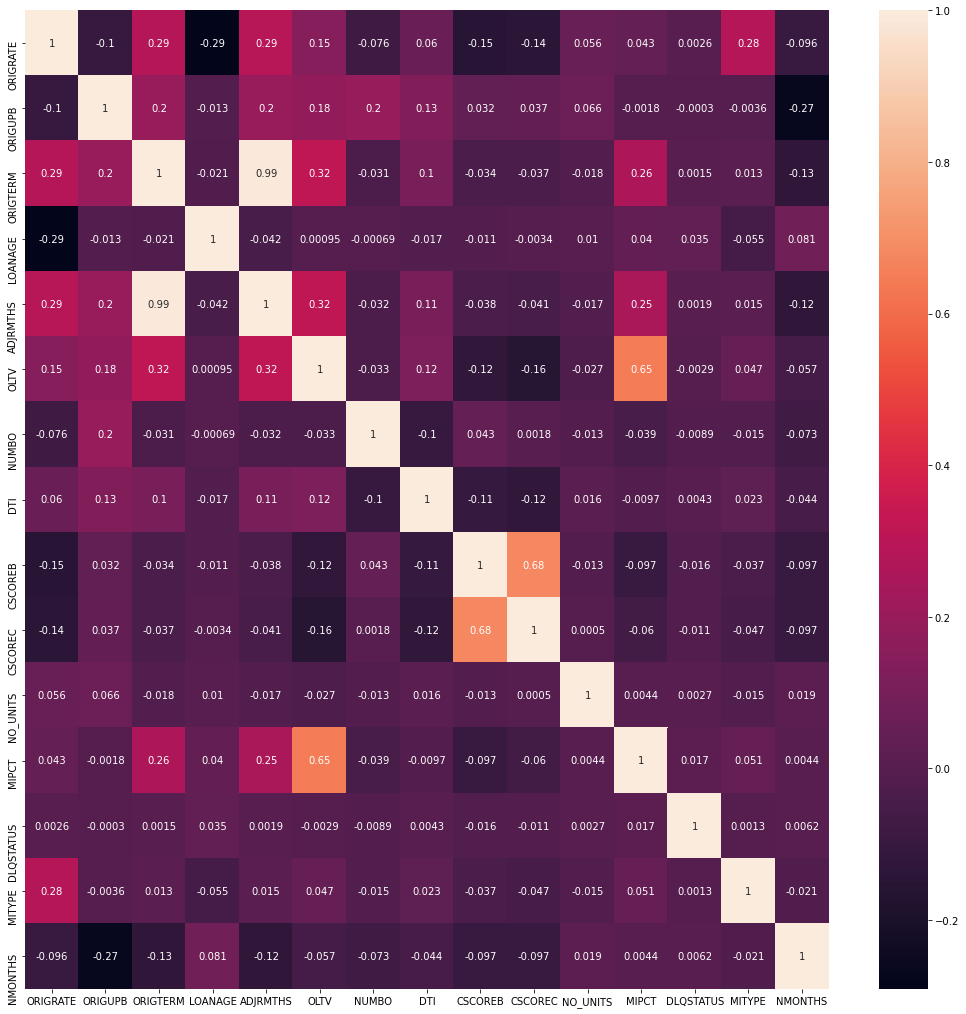

In [10]:
plt.figure(figsize=(18, 18))
sns.heatmap(df.corr(), annot=True)

# Feature Engineering

In [9]:
df.isnull().sum()

ORIGRATE            0
ORIGUPB             0
ORIGTERM            0
LOANAGE             0
ADJRMTHS            0
OLTV                1
NUMBO              86
DTI              7511
CSCOREB          3867
CSCOREC        104041
FIRSTFLAG         112
PURPOSE             0
PROP                0
NO_UNITS            0
OCCSTAT             0
MIPCT          132546
IO             194589
DLQSTATUS           0
MITYPE         132546
RELMORTGIND         0
NMONTHS             0
dtype: int64

In [10]:
df["OLTV"] = df["OLTV"].fillna(98)
df["NUMBO"] = df["NUMBO"].fillna(int(np.round(df["NUMBO"].mean())))
df["DTI"] = df["DTI"].fillna(int(np.round(df["DTI"].mean())))
df["CSCOREB"]=df["CSCOREB"].fillna(int(np.round(df["CSCOREB"].mean())))
df["CSCOREC"]=df["CSCOREC"].fillna(int(np.round(df["CSCOREC"].mean())))
df["FIRSTFLAG"]=df["FIRSTFLAG"].fillna(df["FIRSTFLAG"].mode()[0])
df["IO"]=df["IO"].fillna('Y')
df["MITYPE"]=df["MITYPE"].fillna(4) #null means no Mortgage Insurance, treat as fourth category

In [11]:
df=df.drop(columns=["MIPCT"])
scaler = MinMaxScaler()
df[['ORIGRATE',"ORIGTERM",'ADJRMTHS','CSCOREB','CSCOREC','ORIGUPB','OLTV','DTI']] = scaler.fit_transform(df[['ORIGRATE',"ORIGTERM",'ADJRMTHS','CSCOREB','CSCOREC','ORIGUPB','OLTV','DTI']])
df

,ORIGRATE,ORIGUPB,ORIGTERM,LOANAGE,ADJRMTHS,OLTV,NUMBO,DTI,CSCOREB,CSCOREC,FIRSTFLAG,PURPOSE,PROP,NO_UNITS,OCCSTAT,IO,DLQSTATUS,MITYPE,RELMORTGIND,NMONTHS
0,0.588719,0.192469,1.0,1,0.997214,0.515464,2.0,0.285714,0.721992,0.752556,N,R,SF,1,P,Y,0,4.0,N,17
1,0.544653,0.192469,0.4,0,0.498607,0.814433,1.0,0.539683,0.765560,0.752556,N,C,SF,1,P,Y,0,4.0,N,32
2,0.588719,0.456067,0.4,1,0.493036,0.814433,2.0,0.650794,0.863071,0.842536,N,P,SF,1,P,Y,0,4.0,N,19
3,0.612808,0.282427,1.0,0,1.000000,0.783505,2.0,0.507937,0.659751,0.294479,N,P,SF,1,P,Y,0,4.0,N,21
4,0.647474,0.079498,1.0,0,1.000000,0.814433,2.0,0.317460,0.823651,0.762781,N,C,SF,1,P,Y,0,4.0,N,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,0.618096,0.184100,1.0,0,1.000000,0.814433,1.0,0.539683,0.539419,0.752556,Y,P,SF,1,P,Y,0,4.0,N,14
199996,0.691539,0.163180,1.0,0,1.000000,0.597938,2.0,0.714286,0.510373,0.507157,N,C,SF,1,P,Y,0,4.0,N,23
199997,0.647474,0.129707,1.0,0,0.997214,0.649485,1.0,0.825397,0.497925,0.752556,N,C,SF,1,P,Y,0,4.0,N,17
199998,0.618096,0.110879,0.4,0,0.490251,0.711340,1.0,0.269841,0.815353,0.752556,N,P,CO,1,I,Y,0,4.0,N,40


In [12]:
df.isnull().values.any()

False

In [13]:
df = pd.get_dummies(df, columns = Categorical , drop_first = True)

# Linear Regression Bayasian Modeling

In [14]:
X = df.drop(['NMONTHS'],axis=1)
y = df[['NMONTHS']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.895, random_state=6)

In [15]:
for i in X_train.columns:
    print(i)
    print(X_train[i].unique())

ORIGRATE
[0.61809636 0.54465335 0.63278496 0.57403055 0.73560517 0.66216216
 0.60340776 0.52996475 0.64747356 0.69153937 0.70622797 0.67685076
 0.75029377 0.72091657 0.51527615 0.58871915 0.653349   0.55934195
 0.48589894 0.44183314 0.68683901 0.63572268 0.58284371 0.76498237
 0.54171563 0.47121034 0.61222092 0.62984724 0.65922444 0.49764982
 0.50058754 0.59459459 0.62162162 0.77967098 0.80904818 0.88249119
 0.57696827 0.47003525 0.79435958 0.57109283 0.58754407 0.56521739
 0.4359577  0.44065805 0.62103408 0.60047004 0.62279671 0.67097532
 0.42420682 0.5987074  0.37367803 0.64629847 0.65393655 0.6239718
 0.41245593 0.45945946 0.4559342  0.55346651 0.83842538 0.58225617
 0.82373678 0.45652174 0.67978848 0.63160987 0.82256169 0.64159812
 0.59341951 0.6680376  0.6827262  0.60634548 0.42714454 0.38307873
 0.66509988 0.45358402 0.34077556 0.38542891 0.51233843 0.34782609
 0.52408931 0.33607521 0.37132785 0.91186839 0.50293772 0.51821387
 0.52526439 0.71210341 0.62690952 0.39776733 0.7414806

In [17]:
#to prevent singular matrix which has no inverse
for i in X_train.columns:
    if len(X_train[i].unique())==1:
        print(i)
        X_train=X_train.drop(columns=[i])
        X_test=X_test.drop(columns=[i])

In [18]:
y=y_train.values
X=X_train.values
ones=np.ones((len(X),1))
X=np.c_[ones, X]
n=len(X)
p=len(X[0])

In [19]:
yT=y.transpose()

XT=X.transpose()
XTX=np.matmul(XT,X)
XTXinv=np.linalg.inv(XTX)
X_XTXinv=np.matmul(X,XTXinv)
M=np.matmul(X_XTXinv,XT)

diag=np.diag(np.ones(n))

In [20]:
len(diag[0])

21000

In [21]:
S=2000
#prior
g=n
s20=1
nu0=2

Hg=(g/(g+1))*M
SSRg=np.matmul(np.matmul(yT,(diag-Hg)),y)

rgamma=gamma.rvs(a=(nu0+n)/2, scale=2/(nu0*s20+SSRg), size=S)
s2=[1/i for i in rgamma]

#Vb<- g*solve(t(X)%*%X)/(g+1)
#Eb<- Vb%*%t(X)%*%y
Vb=g*XTXinv/(g+1)
Eb=np.matmul(np.matmul(Vb,XT),y)

E=[]
for i in s2:
    E.append(np.random.normal(0, np.sqrt(i), size=p))

chol = np.linalg.cholesky(Vb)
Echol= np.matmul(E,chol)
EcholT=np.transpose(Echol)

#Posterior
beta=np.transpose(EcholT+Eb)
beta_bayes=[]
for i in range(len(beta[0])):
    summ=0
    for j in range(len(beta)):
        summ+=beta[j][i]
    beta_bayes.append([summ/len(beta)])
y_bayes = np.matmul(X,beta_bayes)
MSE_pred = sum((y - y_bayes)**2) / len(y)
MAE_pred = sum(abs(y - y_bayes)) / len(y)
r2 = 1-sum((y - y_bayes)**2)/sum((y - np.mean(y))**2)
#OLS approach
beta_ols=np.matmul(np.matmul(XTXinv,XT),y)

In [22]:
print(MAE_pred,MSE_pred,r2)

[11.13817955] [263.8842381] [0.70202997]


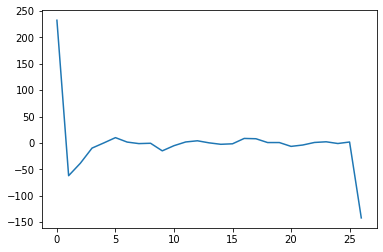

In [23]:
plt.plot(beta_bayes)

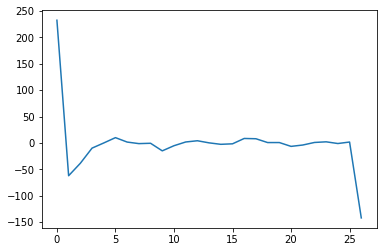

In [24]:
plt.plot(beta_ols)

In [25]:
y_bayes = np.matmul(X,beta_bayes)
y_ols = np.matmul(X,beta_ols)

MSE_bayes = sum((y - y_bayes)**2) / len(y)
MSE_ols = sum((y - y_ols)**2) / len(y)

MAE_bayes = sum(abs(y - y_bayes)) / len(y)
MAE_ols = sum(abs(y - y_ols)) / len(y)

r2_bayes = 1-sum((y - y_bayes)**2)/sum((y - np.mean(y))**2)
r2_ols = 1-sum((y - y_ols)**2)/sum((y - np.mean(y))**2)

In [26]:
#Machine Learning SHOULD BE THE SAME AS OLS
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X, y)
y_ml=lr.predict(X)

MSE_ml = sum((y - y_ml)**2) / len(y)
MAE_ml = sum(abs(y - y_ml)) / len(y)
r2_ml=lr.score(X, y)

In [27]:
print(MSE_bayes,MAE_bayes,r2_bayes)
print(MSE_ols,MAE_ols,r2_ols)
print(MSE_ml,MAE_ml,r2_ml)

[263.8842381] [11.13817955] [0.70202997]
[263.86458562] [11.16519992] [0.70205217]
[263.86458562] [11.16519992] 0.7020521657373238


# Validate the consistency with 9 Fold CV 

In [279]:
#We'll run a manually 9Fold CV
MSE_B=[]
MSE_O=[]
MAE_B=[]
MAE_O=[]
R2_B=[]
R2_O=[]
for fold in range(1,10):
    X = df.drop(['NMONTHS'],axis=1)
    y = df[['NMONTHS']]
    X_train=X[(fold-1)*21000:fold*21000]
    X_test=pd.concat((X[:(fold-1)*21000],X[fold*21000:]))
    y_train=y[(fold-1)*21000:fold*21000] 
    y_test=pd.concat((y[:(fold-1)*21000],y[fold*21000:]))
    
    #to prevent singular matrix which has no inverse
    for i in X_train.columns:
        if len(X_train[i].unique())==1:
            X_train=X_train.drop(columns=[i])
            X_test=X_test.drop(columns=[i])
    
    y=y_train.values
    X=X_train.values
    ones=np.ones((len(X),1))
    X=np.c_[ones, X]
    n=len(X)
    p=len(X[0])
    
    yT=y.transpose()
    XT=X.transpose()
    XTX=np.matmul(XT,X)
    XTXinv=np.linalg.inv(XTX)
    X_XTXinv=np.matmul(X,XTXinv)
    M=np.matmul(X_XTXinv,XT)
    diag=np.diag(np.ones(n))
    
    S=2000
    #prior
    g=n
    s20=1
    nu0=2

    Hg=(g/(g+1))*M
    SSRg=np.matmul(np.matmul(yT,(diag-Hg)),y)

    rgamma=gamma.rvs(a=(nu0+n)/2, scale=2/(nu0*s20+SSRg), size=S)
    s2=[1/i for i in rgamma]

    #Vb<- g*solve(t(X)%*%X)/(g+1)
    #Eb<- Vb%*%t(X)%*%y
    Vb=g*XTXinv/(g+1)
    Eb=np.matmul(np.matmul(Vb,XT),y)

    E=[]
    for i in s2:
        E.append(np.random.normal(0, np.sqrt(i), size=p))

    chol = np.linalg.cholesky(Vb)
    Echol= np.matmul(E,chol)
    EcholT=np.transpose(Echol)

    #Posterior
    beta=np.transpose(EcholT+Eb)
    beta_bayes=[]
    for i in range(len(beta[0])):
        summ=0
        for j in range(len(beta)):
            summ+=beta[j][i]
        beta_bayes.append([summ/len(beta)])    
    beta_ols=np.matmul(np.matmul(XTXinv,XT),y)
    
    y_bayes = np.matmul(X,beta_bayes)
    y_ols = np.matmul(X,beta_ols)

    MSE_bayes = sum((y - y_bayes)**2) / len(y)
    MSE_ols = sum((y - y_ols)**2) / len(y)

    MAE_bayes = sum(abs(y - y_bayes)) / len(y)
    MAE_ols = sum(abs(y - y_ols)) / len(y)

    r2_bayes = 1-sum((y - y_bayes)**2)/sum((y - np.mean(y))**2)
    r2_ols = 1-sum((y - y_ols)**2)/sum((y - np.mean(y))**2)
    
    MSE_B.append(MSE_bayes)
    MSE_O.append(MSE_ols)
    MAE_B.append(MAE_bayes)
    MAE_O.append(MAE_ols)
    R2_B.append(r2_bayes)
    R2_O.append(r2_ols)
print(MSE_B)
print(np.mean(MSE_B))
print(MSE_O)
print(np.mean(MSE_O))
print(MAE_B)
print(np.mean(MAE_B))
print(MAE_O)
print(np.mean(MAE_O))
print(R2_B)
print(np.mean(R2_B))
print(R2_O)
print(np.mean(R2_O))

[array([268.80596188]), array([265.79944106]), array([273.62943417]), array([278.36027264]), array([269.83630404]), array([259.1586668]), array([263.95877781]), array([268.52033031]), array([265.35158578])]
268.157863831468
[array([268.78285254]), array([265.78850323]), array([273.62347492]), array([278.14343537]), array([269.78812929]), array([259.14893411]), array([263.95832035]), array([268.50630644]), array([265.24647398])]
268.10960336002205
[array([11.31938277]), array([11.24103292]), array([11.40612706]), array([11.33553754]), array([11.28599375]), array([11.18843126]), array([11.20066731]), array([11.27534635]), array([11.34491558])]
11.288603837676314
[array([11.28875719]), array([11.21981434]), array([11.39108556]), array([11.42155517]), array([11.32710103]), array([11.16922674]), array([11.20379182]), array([11.29884193]), array([11.27524686])]
11.288380070875661
[array([0.72146216]), array([0.68987197]), array([0.70697774]), array([0.70609865]), array([0.6992552]), array([0

# Rsult

In [283]:
print([i[0] for i in MSE_B])
print(np.mean(MSE_B))
print([i[0] for i in MSE_O])
print(np.mean(MSE_O))
print([i[0] for i in MAE_B])
print(np.mean(MAE_B))
print([i[0] for i in MAE_O])
print(np.mean(MAE_O))
print([i[0] for i in R2_B])
print(np.mean(R2_B))
print([i[0] for i in R2_O])
print(np.mean(R2_O))

[268.80596188203737, 265.799441064753, 273.62943416554106, 278.36027263531645, 269.83630403786145, 259.15866679591755, 263.9587778102773, 268.5203303080286, 265.3515857834793]
268.157863831468
[268.78285254353983, 265.78850323447045, 273.62347492420145, 278.1434353689013, 269.78812928844553, 259.1489341148406, 263.9583203491703, 268.5063064387613, 265.2464739778681]
268.10960336002205
[11.319382768116943, 11.241032921464772, 11.406127062670565, 11.33553754056304, 11.28599375086155, 11.188431257987355, 11.200667311460052, 11.275346345785568, 11.344915580176984]
11.288603837676314
[11.288757191784594, 11.219814338822086, 11.391085562360088, 11.421555174484215, 11.327101030434282, 11.16922673814938, 11.203791821497386, 11.298841925144679, 11.275246855204243]
11.288380070875661
[0.7214621593297805, 0.6898719652470761, 0.7069777356767231, 0.7060986546367338, 0.699255204895145, 0.6934354175846504, 0.6966974492571423, 0.705824861708062, 0.7012242004838901]
0.7023164054243558
[0.72148610532115